# <center><h3>Complex Network Project</h3></center>

In [1]:
import networkx as nx
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.patches as mpatch
plt.style.use("ggplot")

# Pre-Processing

In [2]:
Base_Graph = nx.DiGraph()

department_labels = 'email-Eu-core-department-labels.txt'
email = 'email-Eu-core.txt'

department_labels_csv = pd.read_csv(department_labels, sep=',')
email_csv = pd.read_csv(email, sep=',')

email_csv.head()

,u,v
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7


In [3]:
department_labels_csv.head()

,id,dep
0,0,1
1,1,1
2,2,21
3,3,21
4,4,21


In [4]:
dep_people = {}
# generate dictionary from department labels with keys as department and values as ids
for i in range(len(department_labels_csv)):
    if department_labels_csv['dep'][i] not in dep_people:
        dep_people[department_labels_csv['dep'][i]] = [department_labels_csv['id'][i]]
    else:
        dep_people[department_labels_csv['dep'][i]].append(department_labels_csv['id'][i])
    # print(department_labels_csv['department'][i])
print(dep_people)

{1: [0, 1, 17, 18, 73, 74, 85, 120, 177, 215, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 248, 297, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 341, 414, 415, 449, 459, 468, 479, 516, 517, 603, 605, 629, 645, 650, 675, 696, 697, 731, 734, 743, 764, 775, 797, 798, 846, 852, 872, 904, 905, 916, 1002], 21: [2, 3, 4, 56, 57, 58, 59, 63, 137, 138, 192, 193, 194, 195, 281, 286, 305, 408, 412, 456, 520, 532, 571, 586, 587, 606, 622, 625, 633, 634, 635, 636, 648, 670, 685, 691, 711, 718, 755, 762, 774, 803, 815, 826, 832, 845, 849, 863, 865, 880, 882, 884, 899, 901, 921, 928, 982, 990, 993, 994, 1001], 25: [5, 6, 64, 489, 528, 644], 14: [7, 8, 9, 11, 12, 19, 43, 44, 141, 161, 213, 246, 247, 249, 264, 265, 266, 267, 293, 324, 332, 358, 359, 360, 362, 365, 374, 406, 407, 421, 430, 441, 451, 452, 466, 487, 488, 496, 498, 499, 500, 501, 502, 503, 504, 505, 506, 510, 525, 529, 530, 555, 558, 565, 566, 569, 570, 573, 602, 608, 649, 658, 661, 666, 672, 674, 699, 700, 707, 720, 7

In [5]:
i = 0
dep_color = []
for name in mcolors.CSS4_COLORS:
    i+=1
    if(i == 43):
        break
    dep_color.append(name)

color_map = []
for i in range(len(department_labels_csv)):
    color_map.append(dep_color[department_labels_csv['dep'][i]])

print((len(color_map)))
print(color_map[0])


1005
antiquewhite


In [6]:
# Base_Graph.add_nodes_from()
Base_Graph.add_edges_from(email_csv.to_numpy())

In [7]:
# # nx.draw(Base_Graph, node_color=color_map)
# nx.draw(Base_Graph, pos=nx.spring_layout(Base_Graph))
# # nx.draw(Base_Graph, pos=nx.kamada_kawai_layout(Base_Graph))
# plt.show()

In [8]:
# nx.number_connected_components(Base_Graph.to_undirected())

In [9]:
Subsest_Base_Graph = nx.DiGraph()

email_short = 'email-Eu-core.txt'

email_short_csv = pd.read_csv(email_short, sep=',')

email_short_csv.head()

# Base_Graph.add_nodes_from()
# Subsest_Base_Graph.add_edges_from(email_short_csv.to_numpy())
# nx.draw(Subsest_Base_Graph, node_color=color_map)
# plt.show()

,u,v
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7


In [10]:
undirected_Base_Graph = nx.Graph()

undirected_Base_Graph.add_edges_from(email_csv.to_numpy())
undirected_Base_Graph.remove_edges_from(nx.selfloop_edges(undirected_Base_Graph))
undirected_Base_Graph.remove_nodes_from(list(nx.isolates(undirected_Base_Graph)))
# nx.draw(undirected_Base_Graph)
# plt.show()

# Degree Distribution

In [11]:
def find_alpha(x, y):
    """function to find alpha value of power law distribution"""
    

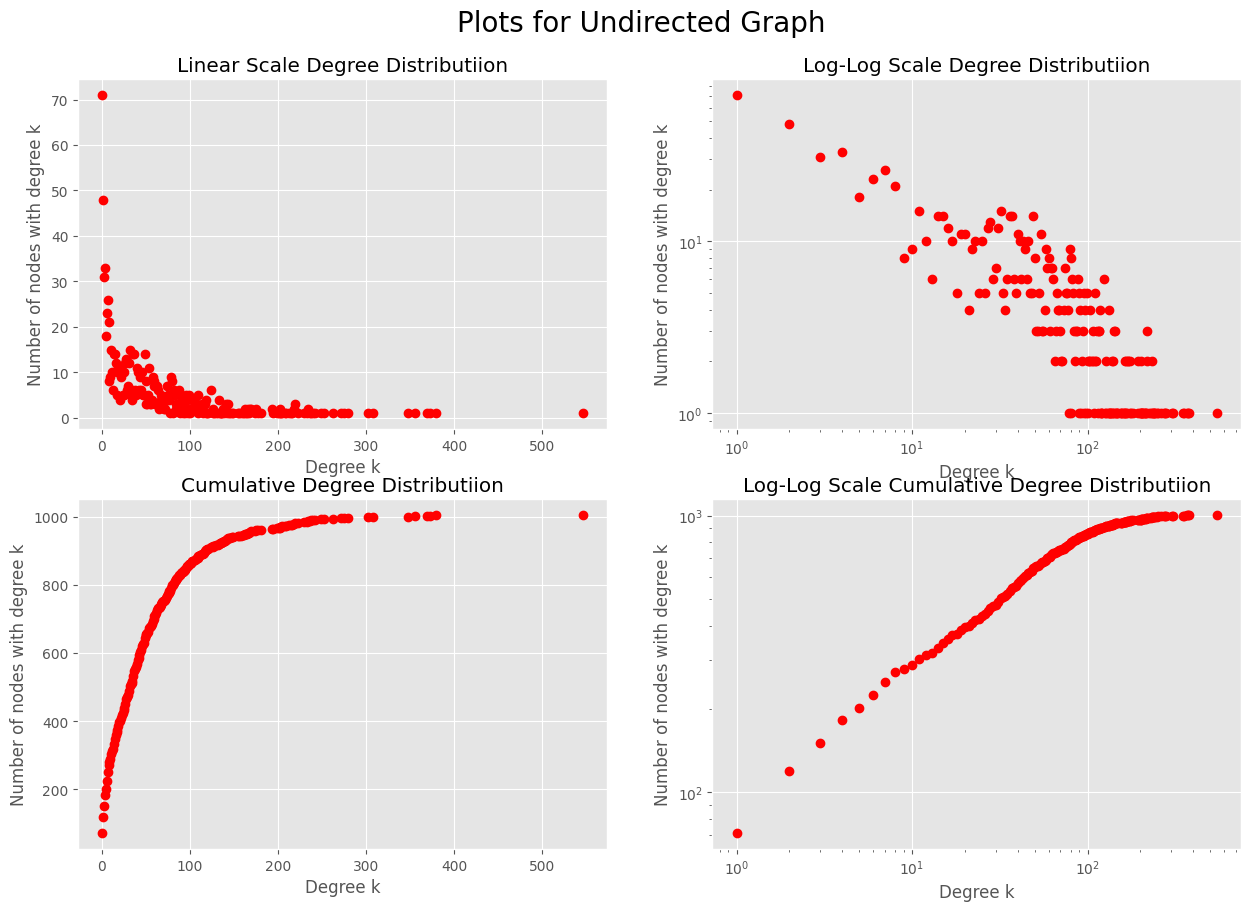

In [13]:
degree = np.array(Base_Graph.degree)[:,1]
unique_elements, counts_elements = np.unique(degree, return_counts=True)
counts_elements = counts_elements/ np.sum(counts_elements)

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Plots for Undirected Graph", y=0.95, fontsize=20)
ax[0, 0].plot(unique_elements, counts_elements, 'ro')
ax[0, 0].set_title("Linear Scale Degree Distributiion")
ax[0, 0].set_xlabel("Degree k")
ax[0, 0].set_ylabel("Number of nodes with degree k")


ax[0, 1].loglog(unique_elements, counts_elements, 'ro')
ax[0, 1].set_title("Log-Log Scale Degree Distributiion")
ax[0, 1].set_xlabel("Degree k")
ax[0, 1].set_ylabel("Number of nodes with degree k")

cumulative = np.cumsum(counts_elements[::-1])
ax[1, 0].plot(unique_elements, cumulative[::-1], 'ro')
ax[1, 0].set_title("Cumulative Degree Distributiion")
ax[1, 0].set_xlabel("Degree k")
ax[1, 0].set_ylabel("Number of nodes with degree k")

ax[1, 1].loglog(unique_elements, cumulative[::-1], 'ro')
ax[1, 1].set_title("Log-Log Scale Cumulative Degree Distributiion")
ax[1, 1].set_xlabel("Degree k")
ax[1, 1].set_ylabel("Number of nodes with degree k")

plt.show()


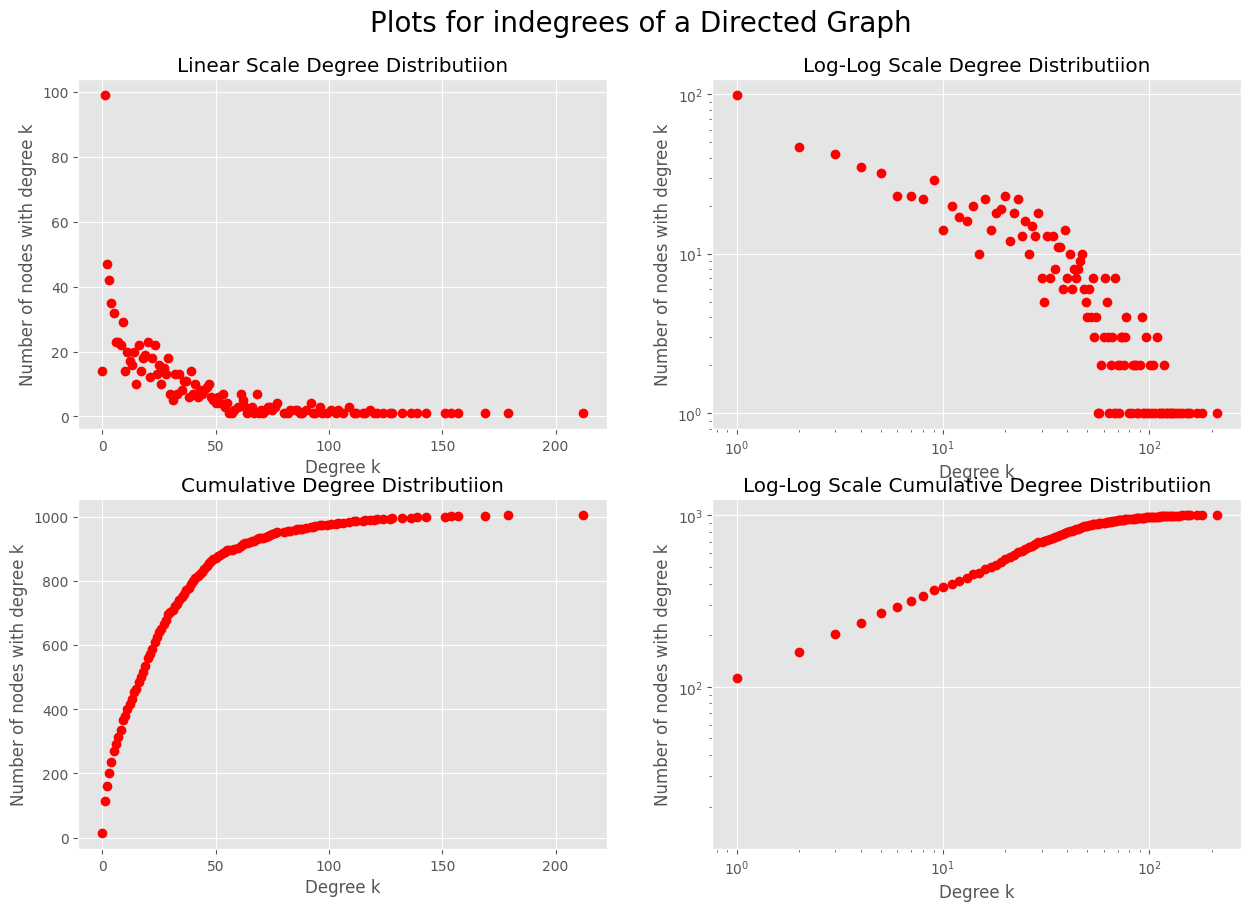

In [14]:
degree = np.array(Base_Graph.in_degree)[:,1]
unique_elements, counts_elements = np.unique(degree, return_counts=True)


fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Plots for indegrees of a Directed Graph", y=0.95, fontsize=20)
ax[0, 0].plot(unique_elements, counts_elements, 'ro')
ax[0, 0].set_title("Linear Scale Degree Distributiion")
ax[0, 0].set_xlabel("Degree k")
ax[0, 0].set_ylabel("Number of nodes with degree k")


ax[0, 1].loglog(unique_elements, counts_elements, 'ro')
ax[0, 1].set_title("Log-Log Scale Degree Distributiion")
ax[0, 1].set_xlabel("Degree k")
ax[0, 1].set_ylabel("Number of nodes with degree k")

cumulative = np.cumsum(counts_elements)
ax[1, 0].plot(unique_elements, cumulative, 'ro')
ax[1, 0].set_title("Cumulative Degree Distributiion")
ax[1, 0].set_xlabel("Degree k")
ax[1, 0].set_ylabel("Number of nodes with degree k")

ax[1, 1].loglog(unique_elements, cumulative, 'ro')
ax[1, 1].set_title("Log-Log Scale Cumulative Degree Distributiion")
ax[1, 1].set_xlabel("Degree k")
ax[1, 1].set_ylabel("Number of nodes with degree k")

plt.show()

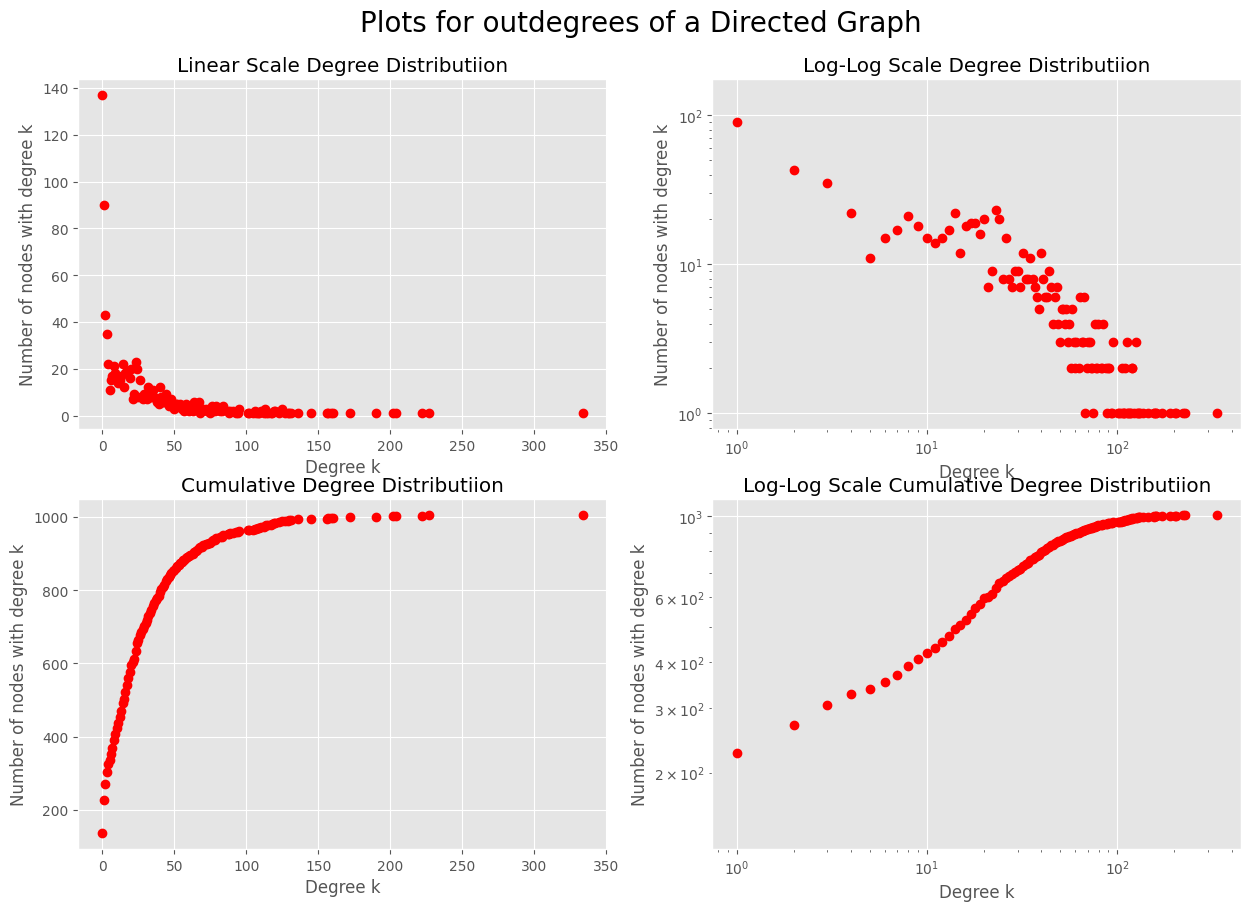

In [15]:
degree = np.array(Base_Graph.out_degree)[:,1]
unique_elements, counts_elements = np.unique(degree, return_counts=True)


fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Plots for outdegrees of a Directed Graph", y=0.95, fontsize=20)
ax[0, 0].plot(unique_elements, counts_elements, 'ro')
ax[0, 0].set_title("Linear Scale Degree Distributiion")
ax[0, 0].set_xlabel("Degree k")
ax[0, 0].set_ylabel("Number of nodes with degree k")


ax[0, 1].loglog(unique_elements, counts_elements, 'ro')
ax[0, 1].set_title("Log-Log Scale Degree Distributiion")
ax[0, 1].set_xlabel("Degree k")
ax[0, 1].set_ylabel("Number of nodes with degree k")

cumulative = np.cumsum(counts_elements)
ax[1, 0].plot(unique_elements, cumulative, 'ro')
ax[1, 0].set_title("Cumulative Degree Distributiion")
ax[1, 0].set_xlabel("Degree k")
ax[1, 0].set_ylabel("Number of nodes with degree k")

ax[1, 1].loglog(unique_elements, cumulative, 'ro')
ax[1, 1].set_title("Log-Log Scale Cumulative Degree Distributiion")
ax[1, 1].set_xlabel("Degree k")
ax[1, 1].set_ylabel("Number of nodes with degree k")

plt.show()

# Louvain Algorithn

In [14]:
louvian_G = Base_Graph.copy()
louvian_G.remove_edges_from(nx.selfloop_edges(louvian_G))
# louvian_G.remove_nodes_from(list(nx.isolates(louvian_G)))
# nx.draw(louvian_G, with_labels=True, font_weight='bold')

In [15]:
def louvain_self(oldgraph, num_iter, threshold=1e-7, all_res = np.array([0, 0.01, 0.05, 0.5])):
    """Function to run Louvain community detection algorithm on a graph"""
    
    num_comm = 0
    all_communities = []
    # Run Louvain algorithm for num_iter times and take the average number of communities
    for i in range(0, num_iter):
        G1 = oldgraph.copy()
        res = all_res[np.random.randint(0, len(all_res))]
        louvian_communites = np.array(nx.community.louvain_communities(G1, resolution=res, threshold=threshold, seed = i))
        num_comm += louvian_communites.shape[0]
        all_communities.append(louvian_communites)
    avg_communities = num_comm/num_iter
    
    return avg_communities, all_communities

In [16]:
# louvian_G_avg_comm, louvian_G_all_comm = louvain_self(louvian_G, 100, threshold=1e-15, all_res = np.array([0, 0.01, 0.05, 0.5]))
louvian_G_avg_comm, louvian_G_all_comm = louvain_self(louvian_G, 1000, threshold=1e-2, all_res = np.array([0.13, 0.15, 0.17])*8)
print(louvian_G_avg_comm)

40.161


In [17]:
louvain_community_size = np.array([])
for i in range(len(louvian_G_all_comm)):
    louvain_community_size = np.append(louvain_community_size, len(louvian_G_all_comm[i]))

print(sorted(louvain_community_size))
# print(np.where(louvain_community_size == 40)[0])
# print(np.where(louvain_community_size == 41)[0])
print(np.where(louvain_community_size == 42)[0])
# print(np.where(louvain_community_size == 43)[0])
# print(np.where(louvain_community_size == 44)[0])

[33.0, 34.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.

In [18]:
louvain_index = np.where(louvain_community_size == 42)[0][0]
louvian_G_all_comm[louvain_index] = sorted(louvian_G_all_comm[louvain_index])
print(len(louvian_G_all_comm[louvain_index]))
for i in range(len(louvian_G_all_comm[louvain_index])):
    print(louvian_G_all_comm[louvain_index][i])
    # print("")

42
{261, 13, 785, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 545, 36, 37, 35, 39, 40, 38, 816, 842, 75, 588, 590, 336, 337, 338, 339, 860, 96, 609, 875, 878, 367, 881, 115, 883, 116, 119, 123, 900, 135, 136, 655, 914, 915, 151, 409, 165, 169, 170, 427, 436, 437, 438, 439, 953, 964, 721, 722, 978, 980, 470, 986, 987, 988, 229, 997, 494, 753, 757, 251}
{160, 512, 882, 724, 821, 730, 591}
{2, 3, 516, 5, 6, 517, 4, 520, 774, 271, 528, 784, 532, 281, 285, 286, 803, 806, 807, 552, 809, 812, 302, 815, 304, 305, 561, 303, 564, 54, 55, 56, 57, 58, 59, 826, 571, 63, 832, 586, 587, 845, 849, 854, 599, 88, 89, 859, 604, 863, 864, 865, 610, 102, 619, 876, 880, 369, 625, 884, 373, 886, 630, 888, 634, 635, 636, 126, 131, 132, 901, 902, 899, 646, 137, 138, 644, 408, 665, 921, 411, 412, 924, 928, 683, 685, 174, 175, 949, 698, 701, 192, 193, 194, 195, 716, 462, 718, 208, 463, 211, 982, 990, 991, 481, 994, 738, 993, 737, 743, 1001, 489, 1004, 750, 755, 762, 763, 252}
{420, 810, 651, 301, 624, 596, 5

In [19]:
louvain_index = np.where(louvain_community_size == 42)[0][-1]
louvian_G_all_comm[louvain_index] = sorted(louvian_G_all_comm[louvain_index])
print(len(louvian_G_all_comm[louvain_index]))
for i in range(len(louvian_G_all_comm[louvain_index])):
    print(louvian_G_all_comm[louvain_index][i])
    # print("")

42
{768, 640, 770, 896, 773, 892, 404, 405, 662, 796, 800, 935, 937, 300, 687, 185, 828, 702, 704, 834, 323, 708, 709, 837, 456, 97, 354, 98, 100, 101, 99, 353, 618, 107, 371, 889, 891, 124, 125, 638}
{898, 259, 966, 647, 72, 715, 524, 787, 20, 21, 22, 920, 728, 92, 230, 942, 818, 435, 885, 887, 127}
{128, 776, 779, 908, 786, 917, 918, 801, 677, 167, 41, 940, 557, 689, 51, 820, 955, 445, 196, 581, 197, 198, 200, 201, 202, 203, 204, 205, 206, 207, 970, 593, 974, 850, 94, 95, 740, 199, 749, 751}
{782, 911, 663, 536, 667, 540, 287, 671, 418, 549, 678, 551, 550, 679, 298, 299, 941, 952, 184, 188, 189, 958, 190, 962, 68, 69, 710, 582, 968, 713, 969, 325, 972, 460, 80, 465, 82, 81, 467, 853, 855, 473, 601, 480, 866, 747, 877, 627, 508, 509, 767}
{0, 1, 260, 775, 519, 268, 17, 18, 788, 297, 560, 307, 309, 310, 311, 312, 313, 314, 315, 316, 317, 67, 73, 330, 74, 331, 596, 341, 85, 86, 872, 366, 629, 120, 905, 650, 400, 146, 177, 690, 695, 696, 459, 717, 979, 726, 215, 218, 219, 220, 221, 222, 

In [20]:
actual_com_List = []
for key, value in dep_people.items():
    print(value)
    actual_com_List.append(value)

[0, 1, 17, 18, 73, 74, 85, 120, 177, 215, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 248, 297, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 341, 414, 415, 449, 459, 468, 479, 516, 517, 603, 605, 629, 645, 650, 675, 696, 697, 731, 734, 743, 764, 775, 797, 798, 846, 852, 872, 904, 905, 916, 1002]
[2, 3, 4, 56, 57, 58, 59, 63, 137, 138, 192, 193, 194, 195, 281, 286, 305, 408, 412, 456, 520, 532, 571, 586, 587, 606, 622, 625, 633, 634, 635, 636, 648, 670, 685, 691, 711, 718, 755, 762, 774, 803, 815, 826, 832, 845, 849, 863, 865, 880, 882, 884, 899, 901, 921, 928, 982, 990, 993, 994, 1001]
[5, 6, 64, 489, 528, 644]
[7, 8, 9, 11, 12, 19, 43, 44, 141, 161, 213, 246, 247, 249, 264, 265, 266, 267, 293, 324, 332, 358, 359, 360, 362, 365, 374, 406, 407, 421, 430, 441, 451, 452, 466, 487, 488, 496, 498, 499, 500, 501, 502, 503, 504, 505, 506, 510, 525, 529, 530, 555, 558, 565, 566, 569, 570, 573, 602, 608, 649, 658, 661, 666, 672, 674, 699, 700, 707, 720, 729, 739, 754, 765, 

# Community Matching based on Similarity

In [21]:
def similarity_score_bet_twoComm(com1, com2, nodes = 1005):
    score = 0.0
    map1 = np.zeros(nodes)
    map2 = np.zeros(nodes)
    for x in com1:
        map1[x] = 1
    for x in com2:
        map2[x] = 1
    
    score = np.sum(map1 * map2)
    # for i in range(0, 1005):
    #     if(map1[i] == 1 and map2[i] == 1):
    #         score += 1.0
    
    return ((score*score)/(len(com1)*len(com2)))

In [22]:
# similarity_score_bet_twoComm(louvian_G_all_comm[louvain_index][0], actual_com_List[0])

In [23]:
def accuracy_of_community_detection(list_com1, list_com2, nodes = 1005, threshold = 0.3):
    new_list1 = []
    new_list2 = list_com2.copy()

    for x in list_com1:
        if(len(x) > int(threshold*nodes/100)):
            new_list1.append(x)
    
    size1 = len(new_list1)

    score = 0.0
    for x in new_list1:
        max_score = 0.0
        max_index = -1
        i = 0
        if(len(new_list2) == 0):
            break
        for y in new_list2:
            s = similarity_score_bet_twoComm(x, y, nodes)
            # print(s)
            if(s > max_score):
                max_score = s
                max_index = i
            i += 1
        del new_list2[max_index]
        score += max_score
        # print(max_score)
    
    return score/size1

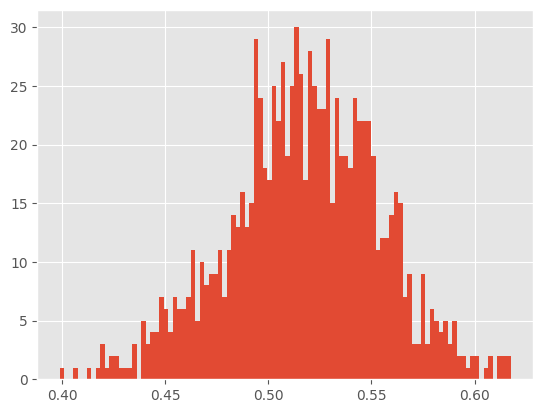

In [29]:
def accuracy_of_community_detection_plot():
    accuracy = np.array([])
    for i in range(len(louvian_G_all_comm)):
        accuracy = np.append(accuracy, accuracy_of_community_detection(louvian_G_all_comm[i], actual_com_List, nodes=1005))
    # plot histogram of accuracy
    plt.hist(accuracy, bins=100)

accuracy_of_community_detection_plot()

In [25]:
louvain_index = np.where(louvain_community_size == 42)[0][-1]
louvian_G_all_comm[louvain_index]
# actual_com_List
print(accuracy_of_community_detection(louvian_G_all_comm[louvain_index], actual_com_List, 1005, 0.3))

0.509136329920294


In [26]:
max_score = 0.0
best_community = []
for x in louvian_G_all_comm:
    score = accuracy_of_community_detection(x, actual_com_List, 1005, 0.3)
    # print(score)
    if(score > max_score):
        max_score = score
        best_community = x

print("The best score is: "+str(max_score))
print("The size of the best detected community is: "+str(len(best_community)))
print("The best community is :")
print(best_community)

The best score is: 0.6175305349776974
The size of the best detected community is: 35
The best community is :
[{261, 263, 527, 795, 547, 40, 47, 816, 48, 318, 842, 75, 76, 333, 847, 336, 337, 338, 339, 603, 860, 96, 361, 875, 367, 113, 114, 115, 116, 370, 883, 119, 881, 123, 892, 891, 895, 897, 900, 135, 136, 655, 914, 916, 919, 151, 925, 414, 417, 165, 423, 169, 170, 171, 427, 686, 436, 437, 438, 439, 442, 443, 444, 449, 455, 976, 978, 980, 981, 725, 983, 470, 724, 986, 987, 736, 485, 753, 245, 757, 251}
 {640, 768, 770, 323, 708, 709, 838, 404, 662, 800, 97, 354, 99, 98, 353, 100, 101, 935, 937, 618, 687, 371, 185, 124, 125}
 {643, 70, 71, 780, 654, 84, 217, 288, 162, 612, 431, 432, 49, 50, 433, 752}
 {7, 264, 265, 8, 11, 12, 525, 267, 266, 9, 529, 530, 19, 533, 804, 293, 805, 43, 44, 555, 558, 565, 566, 823, 569, 570, 827, 573, 830, 833, 324, 778, 332, 844, 856, 602, 608, 358, 359, 360, 616, 362, 365, 374, 893, 649, 141, 912, 913, 661, 406, 407, 666, 922, 672, 161, 674, 421, 430, 950

In [27]:
max_score = 0.0
best_community = []
for x in louvian_G_all_comm:
    if(len(x) == 42):
        score = accuracy_of_community_detection(x, actual_com_List, 1005, 0.3)
        # print(score)
        if(score > max_score):
            max_score = score
            best_community = x

print("The best score is: "+str(max_score))
print("The size of the best detected community is: "+str(len(best_community)))
print("The best community is :")
print(best_community)

The best score is: 0.5941698449865269
The size of the best detected community is: 42
The best community is :
[{288, 162, 643, 612, 70, 71, 780, 431, 432, 433, 50, 49, 84, 217}
 {0, 1, 519, 775, 268, 17, 18, 788, 537, 793, 297, 560, 307, 309, 310, 311, 312, 313, 314, 315, 316, 317, 73, 74, 331, 330, 85, 341, 613, 614, 872, 366, 629, 120, 905, 650, 146, 177, 690, 695, 696, 459, 717, 979, 726, 215, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 734, 745, 1002, 756, 758, 759, 248, 764}
 {897, 263, 527, 916, 919, 795, 925, 414, 417, 547, 423, 171, 47, 48, 442, 443, 444, 318, 449, 455, 76, 333, 847, 976, 725, 981, 983, 603, 479, 736, 485, 361, 113, 370, 114, 245, 895}
 {128, 776, 908, 786, 917, 918, 801, 677, 167, 41, 940, 557, 942, 689, 51, 820, 955, 64, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 974, 207, 593, 850, 970, 94, 95, 740, 749, 751}
 {7, 264, 265, 9, 11, 266, 12, 267, 525, 8, 529, 530, 19, 533, 804, 293, 805, 555, 44, 43, 558, 565, 566, 823, 569, 570, 827, 573

In [35]:
def similarity_score_bet_twoComm_2(com1, com2, nodes = 1005):
    score = 0.0
    map1 = np.zeros(nodes)
    map2 = np.zeros(nodes)
    for x in com1:
        map1[x] = 1
    for x in com2:
        map2[x] = 1
    
    score = np.sum(map1 * map2)
    # for i in range(0, 1005):
    #     if(map1[i] == 1 and map2[i] == 1):
    #         score += 1.0
    
    return score


# similarity_score_bet_twoComm(louvian_G_all_comm[louvain_index][0], actual_com_List[0])
def accuracy_of_community_detection_2(list_com1, list_com2, nodes = 1005, threshold = 0.3):
    new_list1 = []
    new_list2 = list_com2.copy()

    for x in list_com1:
        if(len(x) > int(threshold*nodes/100)):
            new_list1.append(x)
    
    size1 = len(new_list1)

    score = 0.0
    for x in new_list1:
        max_score = 0.0
        max_index = -1
        i = 0
        if(len(new_list2) == 0):
            break
        for y in new_list2:
            s = similarity_score_bet_twoComm_2(x, y, nodes)
            # print(s)
            if(s > max_score):
                max_score = s
                max_index = i
            i += 1
        del new_list2[max_index]
        score += max_score
        # print(max_score)
    
    return score/nodes

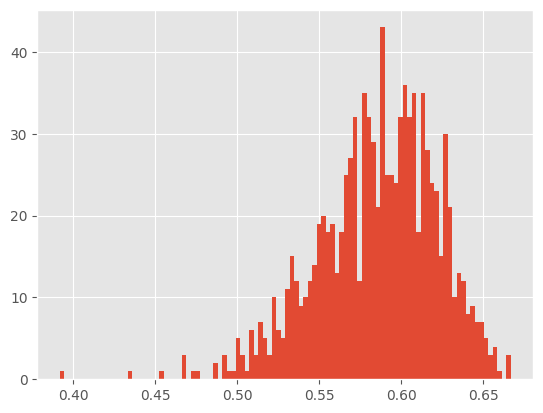

In [36]:
def accuracy_of_community_detection_plot_2():
    accuracy = np.array([])
    for i in range(len(louvian_G_all_comm)):
        accuracy = np.append(accuracy, accuracy_of_community_detection_2(louvian_G_all_comm[i], actual_com_List, nodes=1005))
    # plot histogram of accuracy
    plt.hist(accuracy, bins=100)

accuracy_of_community_detection_plot_2()

In [37]:
louvain_index = np.where(louvain_community_size == 42)[0][-1]
louvian_G_all_comm[louvain_index]
# actual_com_List
print(accuracy_of_community_detection_2(louvian_G_all_comm[louvain_index], actual_com_List, 1005, 0.3))

0.6358208955223881


In [38]:
max_score = 0.0
best_community = []
for x in louvian_G_all_comm:
    score = accuracy_of_community_detection_2(x, actual_com_List, 1005, 0.3)
    # print(score)
    if(score > max_score):
        max_score = score
        best_community = x

print("The best score is: "+str(max_score))
print("The size of the best detected community is: "+str(len(best_community)))
print("The best community is :")
print(best_community)

The best score is: 0.6666666666666666
The size of the best detected community is: 45
The best community is :
[{261, 13, 655, 785, 915, 23, 24, 409, 26, 151, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 39, 165, 438, 545, 953, 964, 75, 588, 844, 590, 721, 722, 980, 470, 986, 988, 609, 229, 997, 878, 367, 494, 624, 757, 119}
 {643, 780, 654, 152, 792, 288, 162, 431, 432, 433, 50, 49, 693, 186, 70, 71, 594, 83, 84, 727, 217, 601, 612, 364, 492, 752, 372, 373, 759, 121, 890, 767}
 {768, 640, 770, 323, 708, 709, 838, 834, 704, 837, 769, 404, 662, 800, 97, 354, 98, 100, 101, 353, 935, 99, 937, 618, 107, 687, 371, 185, 124, 125, 702}
 {117, 118, 279}
 {482, 867, 134, 934, 583, 521, 554, 553, 848, 340, 598, 535, 766}
 {898, 911, 663, 536, 920, 667, 540, 671, 287, 418, 549, 550, 551, 679, 678, 298, 299, 42, 941, 952, 184, 187, 188, 189, 62, 190, 958, 962, 68, 69, 710, 582, 968, 969, 454, 713, 972, 80, 81, 465, 467, 855, 473, 480, 866, 230, 106, 747, 877, 627, 508, 509}
 {0, 1, 519, 7

In [39]:
max_score = 0.0
best_community = []
for x in louvian_G_all_comm:
    if(len(x) == 42):
        score = accuracy_of_community_detection_2(x, actual_com_List, 1005, 0.3)
        # print(score)
        if(score > max_score):
            max_score = score
            best_community = x

print("The best score is: "+str(max_score))
print("The size of the best detected community is: "+str(len(best_community)))
print("The best community is :")
print(best_community)

The best score is: 0.6517412935323383
The size of the best detected community is: 42
The best community is :
[{288, 162, 643, 612, 70, 71, 780, 431, 432, 433, 50, 49, 84, 217}
 {0, 1, 519, 775, 268, 17, 18, 788, 537, 793, 297, 560, 307, 309, 310, 311, 312, 313, 314, 315, 316, 317, 73, 74, 331, 330, 85, 341, 613, 614, 872, 366, 629, 120, 905, 650, 146, 177, 690, 695, 696, 459, 717, 979, 726, 215, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 734, 745, 1002, 756, 758, 759, 248, 764}
 {897, 263, 527, 916, 919, 795, 925, 414, 417, 547, 423, 171, 47, 48, 442, 443, 444, 318, 449, 455, 76, 333, 847, 976, 725, 981, 983, 603, 479, 736, 485, 361, 113, 370, 114, 245, 895}
 {128, 776, 908, 786, 917, 918, 801, 677, 167, 41, 940, 557, 942, 689, 51, 820, 955, 64, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 974, 207, 593, 850, 970, 94, 95, 740, 749, 751}
 {7, 264, 265, 9, 11, 266, 12, 267, 525, 8, 529, 530, 19, 533, 804, 293, 805, 555, 44, 43, 558, 565, 566, 823, 569, 570, 827, 573

# Centralities

In [27]:
def degree_centrality(graph1):
    return nx.degree_centrality(graph1)

In [28]:
def closeness_centrality(graph1):
    return nx.closeness_centrality(graph1)

In [29]:
def betweenness_centrality(graph1):
    return nx.betweenness_centrality(graph1)

In [30]:
def eigenvector_centrality(graph1):
    return nx.eigenvector_centrality(graph1)

In [31]:
def hubs_and_authorities(graph1):
    return nx.hits(graph1)

In [36]:
def katz_centrality(graph1):
    return nx.katz_centrality(graph1, 0.1, 1, 100000)

In [33]:
def pagerank(graph1):
    return nx.pagerank(graph1)

In [39]:
print("The Degree Centrality of base graph is: \n", degree_centrality(Base_Graph))
print("The Closeness Centrality of base graph is: \n", closeness_centrality(Base_Graph))
print("The Betweenness Centrality of base graph is: \n", betweenness_centrality(Base_Graph))
print("The Eigenvector Centrality of base graph is: \n", eigenvector_centrality(Base_Graph))
# print("The Katz Centrality of base graph is: \n", katz_centrality(Base_Graph))
print("The hubs and authorities of base graph is: \n", hubs_and_authorities(Base_Graph))
print("The page rank of the base graph is: \n", pagerank(Base_Graph))

The Degree Centrality of base graph is: 
 {0: 0.07270916334661355, 1: 0.05179282868525896, 2: 0.1603585657370518, 3: 0.11752988047808764, 4: 0.16235059760956175, 5: 0.2788844621513944, 6: 0.20119521912350596, 7: 0.11553784860557768, 8: 0.061752988047808766, 9: 0.05976095617529881, 10: 0.07470119521912351, 11: 0.13346613545816732, 12: 0.09561752988047809, 13: 0.23207171314741035, 14: 0.12749003984063745, 15: 0.08167330677290836, 16: 0.1145418326693227, 17: 0.16633466135458166, 18: 0.08764940239043825, 19: 0.11952191235059761, 20: 0.11752988047808764, 21: 0.23904382470119523, 22: 0.026892430278884463, 23: 0.13147410358565736, 24: 0.06274900398406374, 25: 0.049800796812749, 26: 0.052788844621513946, 27: 0.09561752988047809, 28: 0.17330677290836652, 29: 0.09362549800796813, 30: 0.11155378486055777, 31: 0.08167330677290836, 32: 0.054780876494023904, 33: 0.04282868525896414, 34: 0.04880478087649402, 35: 0.09661354581673307, 36: 0.06274900398406374, 37: 0.053784860557768925, 38: 0.06972111553

In [105]:
def score_based_on_centralities(c1, c2, c3, c4, nodes = 1005):
    map1 = {}
    # w4 pagerank -> highest -> 0.4
    # w3 eigenvector -> second highest -> 0.3
    # w2 betweenness -> third highest -> 0.15
    # w1 closeness -> third highest -> 0.15

    w4 = 0.4
    w3 = 0.3
    w2 = 0.15
    w1 = 0.15

    # i = 0
    for key in c1:
        # map1[i][1] = w1*c1[i][1] + w2*c2[i][1] + w3*c3[i][1] + w4*c4[i][1]
        # map1[i][1] = w1*c1[i] + w2*c2[i] + w3*c3[i] + w4*c4[i]
        # print(key)
        map1[key] = w1*c1[key] + w2*c2[key] + w3*c3[key] + w4*c4[key]
    
    return map1

In [106]:
# custom_score = score_based_on_centralities(closeness_centrality(Base_Graph), betweenness_centrality(Base_Graph), eigenvector_centrality(Base_Graph), pagerank(Base_Graph))
# print("The custom ranking is: \n", custom_score[custom_score[:,1].argsort()])

In [134]:
def plot_comp_vs_CustomNodeRemoved(g1, nodes = 1005):
    graph1 = g1.copy()
    number_of_components = [[]]
    number_of_components.append([-1, nx.number_connected_components(graph1)])
    # while(graph1.number_of_nodes() > nodes - 100):
    y = []
    x = []
    i = 0
    y.append(nx.number_connected_components(graph1))
    i += 1
    x.append(i)
    for _ in range(100):
        print("Number of Nodes removed: ", nodes - graph1.number_of_nodes())
        print("Number of Components: ", nx.number_connected_components(graph1))
        map_score = score_based_on_centralities(closeness_centrality(graph1), betweenness_centrality(graph1), eigenvector_centrality(graph1), pagerank(graph1), graph1.number_of_nodes())
        custom_score = np.array([[key, value] for key, value in map_score.items()])
        # print(custom_score)
        custom_score = custom_score[custom_score[:,1].argsort()]
        node_to_remove = int(custom_score[-1][0])
        graph1.remove_node(node_to_remove)
        y.append(nx.number_connected_components(graph1))
        i += 1
        x.append(i)
        number_of_components.append([node_to_remove, nx.number_connected_components(graph1)])

    # y = np.array(number_of_components)[:,1]
    # x = np.array([i for i in range(len(number_of_components))])
    plt.xlabel("Number of Nodes Removed")
    plt.ylabel("Number of Connected Components")
    plt.plot(x, y)
    return x, y

Number of Nodes removed:  0
Number of Components:  20
Number of Nodes removed:  1
Number of Components:  20
Number of Nodes removed:  2
Number of Components:  22
Number of Nodes removed:  3
Number of Components:  23
Number of Nodes removed:  4
Number of Components:  26
Number of Nodes removed:  5
Number of Components:  26
Number of Nodes removed:  6
Number of Components:  26
Number of Nodes removed:  7
Number of Components:  26
Number of Nodes removed:  8
Number of Components:  26
Number of Nodes removed:  9
Number of Components:  27
Number of Nodes removed:  10
Number of Components:  27
Number of Nodes removed:  11
Number of Components:  27
Number of Nodes removed:  12
Number of Components:  28
Number of Nodes removed:  13
Number of Components:  28
Number of Nodes removed:  14
Number of Components:  31
Number of Nodes removed:  15
Number of Components:  31
Number of Nodes removed:  16
Number of Components:  34
Number of Nodes removed:  17
Number of Components:  34
Number of Nodes remo

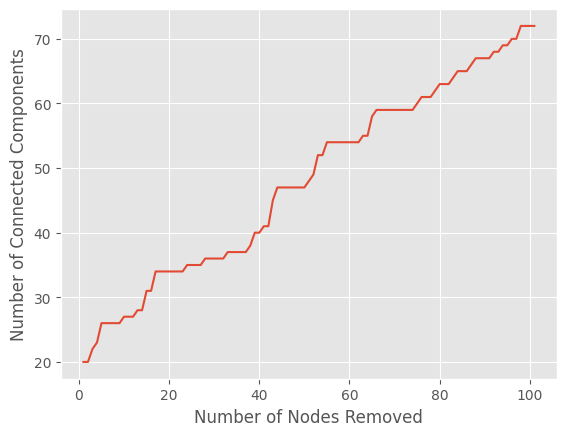

In [135]:
undirected_Base_Graph = Base_Graph.copy()
undirected_Base_Graph.remove_edges_from(nx.selfloop_edges(undirected_Base_Graph))
undirected_Base_Graph = undirected_Base_Graph.to_undirected()
num_Nodes, num_Comp = plot_comp_vs_CustomNodeRemoved(undirected_Base_Graph)

In [130]:
def plot_comp_vs_CustomNodeRemoved1(g1, nodes = 1005):
    graph1 = g1.copy()
    number_of_components = [[]]
    number_of_components.append([-1, nx.number_connected_components(graph1)])
    map_score = score_based_on_centralities(closeness_centrality(graph1), betweenness_centrality(graph1), eigenvector_centrality(graph1), pagerank(graph1), graph1.number_of_nodes())
    custom_score = np.array([[key, value] for key, value in map_score.items()])
    # print(custom_score)
    custom_score = custom_score[custom_score[:,1].argsort()]
    y = []
    x = []
    i = 0
    y.append(nx.number_connected_components(graph1))
    i += 1
    x.append(i)
    while(graph1.number_of_nodes() > 100):
        print("Number of Nodes removed: ", nodes - graph1.number_of_nodes())
        print("Number of Components: ", nx.number_connected_components(graph1))
        node_to_remove = int(custom_score[-1][0])
        graph1.remove_node(node_to_remove)
        number_of_components.append([node_to_remove, nx.number_connected_components(graph1)])
        y.append(nx.number_connected_components(graph1))
        i += 1
        x.append(i)
        custom_score = np.delete(custom_score, -1, 0)

    # y = np.array(number_of_components)[:,1]
    # x = np.array([i for i in range(len(number_of_components))])
    plt.xlabel("Number of Nodes Removed")
    plt.ylabel("Number of Connected Components")
    plt.plot(x, y)
    return x, y

Number of Nodes removed:  0
Number of Components:  20
Number of Nodes removed:  1
Number of Components:  20
Number of Nodes removed:  2
Number of Components:  22
Number of Nodes removed:  3
Number of Components:  23
Number of Nodes removed:  4
Number of Components:  26
Number of Nodes removed:  5
Number of Components:  26
Number of Nodes removed:  6
Number of Components:  26
Number of Nodes removed:  7
Number of Components:  26
Number of Nodes removed:  8
Number of Components:  26
Number of Nodes removed:  9
Number of Components:  27
Number of Nodes removed:  10
Number of Components:  27
Number of Nodes removed:  11
Number of Components:  28
Number of Nodes removed:  12
Number of Components:  28
Number of Nodes removed:  13
Number of Components:  28
Number of Nodes removed:  14
Number of Components:  29
Number of Nodes removed:  15
Number of Components:  29
Number of Nodes removed:  16
Number of Components:  29
Number of Nodes removed:  17
Number of Components:  29
Number of Nodes remo

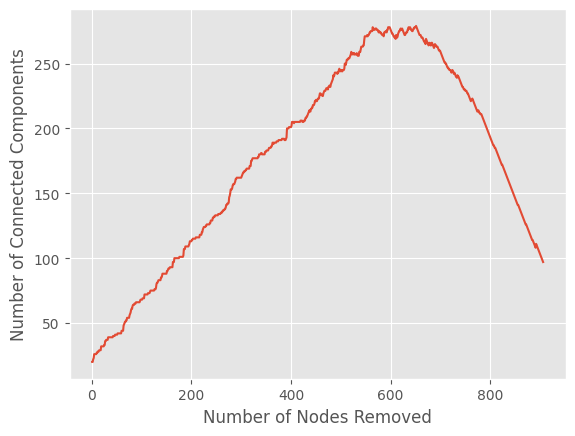

In [136]:
num_Nodes1, num_Comp1 = plot_comp_vs_CustomNodeRemoved1(undirected_Base_Graph)

In [141]:
def plot_comp_vs_PageRankNodeRemoved(g1, nodes = 1005):
    graph1 = g1.copy()
    number_of_components = [[]]
    number_of_components.append([-1, nx.number_connected_components(graph1)])
    # while(graph1.number_of_nodes() > nodes - 100):
    y = []
    x = []
    i = 0
    y.append(nx.number_connected_components(graph1))
    i += 1
    x.append(i)
    for _ in range(nodes):
        print("Number of Nodes removed: ", nodes - graph1.number_of_nodes())
        print("Number of Components: ", nx.number_connected_components(graph1))
        map_score = nx.pagerank(graph1)
        custom_score = np.array([[key, value] for key, value in map_score.items()])
        # print(custom_score)
        custom_score = custom_score[custom_score[:,1].argsort()]
        node_to_remove = int(custom_score[-1][0])
        graph1.remove_node(node_to_remove)
        y.append(nx.number_connected_components(graph1))
        i += 1
        x.append(i)
        number_of_components.append([node_to_remove, nx.number_connected_components(graph1)])

    # y = np.array(number_of_components)[:,1]
    # x = np.array([i for i in range(len(number_of_components))])
    plt.xlabel("Number of Nodes Removed")
    plt.ylabel("Number of Connected Components")
    plt.plot(x, y)
    return x, y

Number of Nodes removed:  0
Number of Components:  20
Number of Nodes removed:  1
Number of Components:  20
Number of Nodes removed:  2
Number of Components:  22
Number of Nodes removed:  3
Number of Components:  23
Number of Nodes removed:  4
Number of Components:  26
Number of Nodes removed:  5
Number of Components:  26
Number of Nodes removed:  6
Number of Components:  26
Number of Nodes removed:  7
Number of Components:  29
Number of Nodes removed:  8
Number of Components:  29
Number of Nodes removed:  9
Number of Components:  30
Number of Nodes removed:  10
Number of Components:  30
Number of Nodes removed:  11
Number of Components:  30
Number of Nodes removed:  12
Number of Components:  34
Number of Nodes removed:  13
Number of Components:  37
Number of Nodes removed:  14
Number of Components:  37
Number of Nodes removed:  15
Number of Components:  37
Number of Nodes removed:  16
Number of Components:  38
Number of Nodes removed:  17
Number of Components:  38
Number of Nodes remo

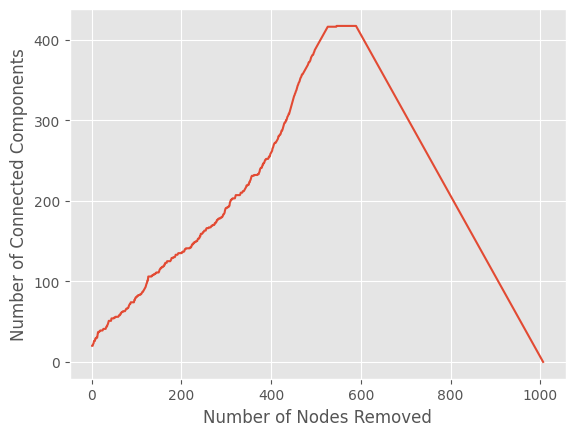

In [142]:
num_Nodes_pageRank, num_Comp_pageRank = plot_comp_vs_PageRankNodeRemoved(undirected_Base_Graph)